Text(0, 0.5, 'malic_acid')

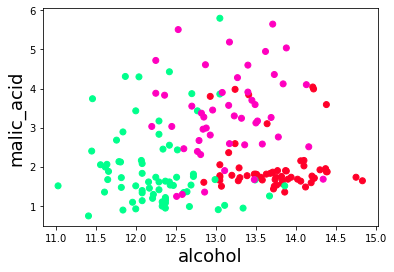

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_wine
wine=load_wine()   #loading iris dataset from sklearn.datasets
x=wine.data
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])


plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [4]:
kmedoid = KMedoids(init="heuristic", n_clusters=3, max_iter=300, random_state=42)
y = kmedoid.fit_predict(x)

In [5]:
print("K-Medoids Cluster Centers")
print(kmedoid.cluster_centers_)
print("Cluster Labels")
print(kmedoid.labels_)

K-Medoids Cluster Centers
[[1.260e+01 2.460e+00 2.200e+00 1.850e+01 9.400e+01 1.620e+00 6.600e-01
  6.300e-01 9.400e-01 7.100e+00 7.300e-01 1.580e+00 6.950e+02]
 [1.349e+01 1.660e+00 2.240e+00 2.400e+01 8.700e+01 1.880e+00 1.840e+00
  2.700e-01 1.030e+00 3.740e+00 9.800e-01 2.780e+00 4.720e+02]
 [1.383e+01 1.570e+00 2.620e+00 2.000e+01 1.150e+02 2.950e+00 3.400e+00
  4.000e-01 1.720e+00 6.600e+00 1.130e+00 2.570e+00 1.130e+03]]
Cluster Labels
[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 2 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


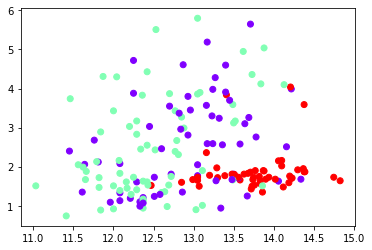

In [6]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmedoid.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

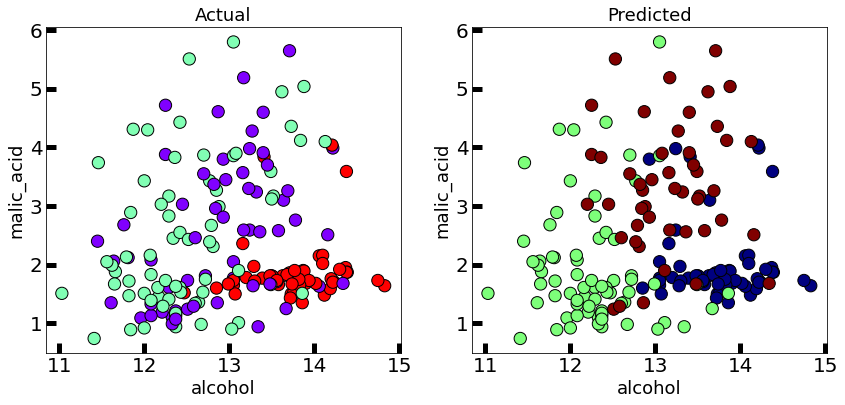

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [8]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmedoid.labels_)

The silhouette score is :


0.566648040863657

In [9]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmedoid.labels_)

The calinski harabasz score is :


539.3792353535451

In [10]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmedoid.labels_)

The davies bouldin score is :


0.5292394126003174